# Predator prey with cabbage

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
# Define constants, but we do it as a class (to later make passing it around easier)

class Const:
    def __init__(self):
        self.max_animals = 100
        self.n_animals_start = 50  # Original n_animals
        self.n_steps = 100
        self.vmin = 0.01
        self.vmax = 0.05
        self.hp_baby = 10
        self.hp_reproduction = 30

In [3]:
# Build the model
def model(c, show_dotses=False, n_trials=1):
    history = np.zeros((c.n_steps, n_trials))

    for i_trial in range(n_trials):
        hp = np.random.uniform(low=c.hp_baby, high=c.hp_reproduction, size=c.max_animals)
        x = np.random.uniform(size=c.max_animals)
        y = np.random.uniform(size=c.max_animals)
        vx = np.random.uniform(size=c.max_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.max_animals,low=0,high=2) - 1)
        vy = np.random.uniform(size=c.max_animals, low=c.vmin, high=c.vmax)*(
            2*np.random.randint(size=c.max_animals,low=0,high=2) - 1)

        if show_dotses: # Plotting preparation
            fig = plt.figure(figsize=(3,3))
            ax = plt.subplot(111) # No subplots actually, just creating axes
            plt.xlim((0,1));
            plt.ylim((0,1));
            fig.show()
            fig.canvas.draw()

        for t in range(c.n_steps):
            x += vx
            y += vy

            # Reflect from the walls
            vx = np.where(np.logical_or(x>1,x<0), -vx , vx)
            vy = np.where(np.logical_or(y>1,y<0), -vy , vy)
            
            n_animals = c.max_animals
            
            if show_dotses: # Actual animation
                ax.clear()
                plt.plot(x, y, 'k.',markersize=5);
                plt.xlim((0,1));
                plt.ylim((0,1));
                fig.canvas.draw() # Redraws the canvas (key secret command to animate things)
        # The time loop is over

        history[:,i_trial] = n_animals
    return np.mean(history, axis=1)

<IPython.core.display.Javascript object>


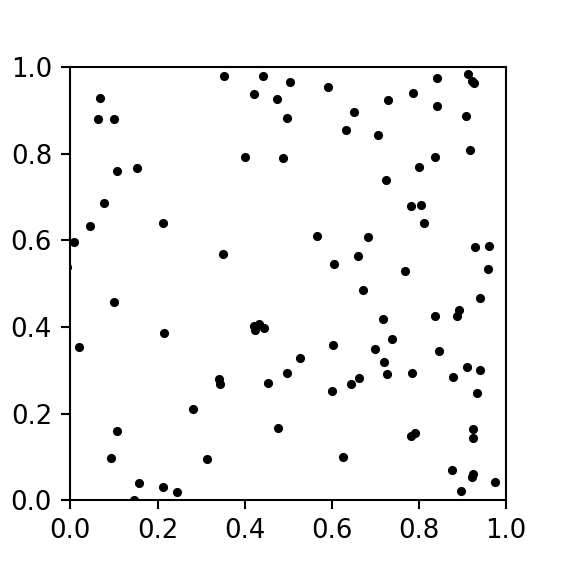

In [5]:
c = Const()
model(c, show_dotses=True);